In [2]:
from IPython.display import Image

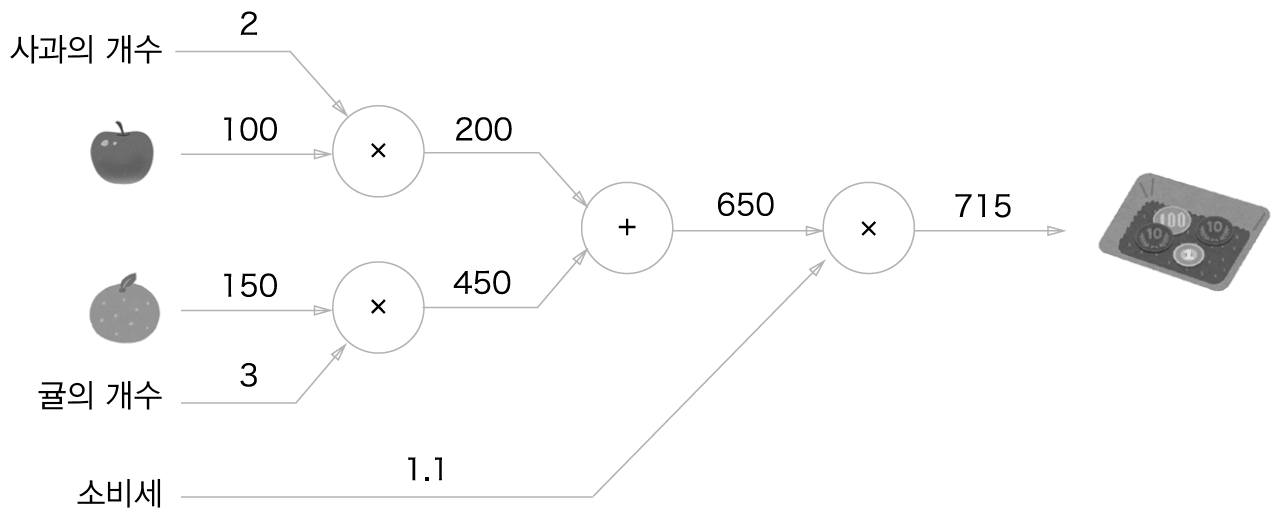

In [2]:
Image("1.png")

계산 그래프 computational graph 는 계산 과정을 그래프로 나타낸 것.   
노드와 에지로 표현되는 그래프 자료구조   
노드는 연산자 operator   
에지는 피연산자 operand   

순전파 : 계산 그래프에서 계산을 왼쪽에서 오른쪽으로 진행하는 것

# 계산 그래프의 장점

### 1. 복잡한 계산을 단순한 계산들로 (하나의 노드와 거기에 연결된 엣지들로) 분할하여   
### 국소적 계산을 전파함으로써 최종 결과를 얻는다

### 2. 중간 계산 결과들을 모두 저장할 수 있다

### 3. 역전파를 통해 미분을 효율적으로 계산할 수 있다   
## 미분 공식에서 해석적으로 미분값을 구한 것과 같은 결과를 얻을 수 있다

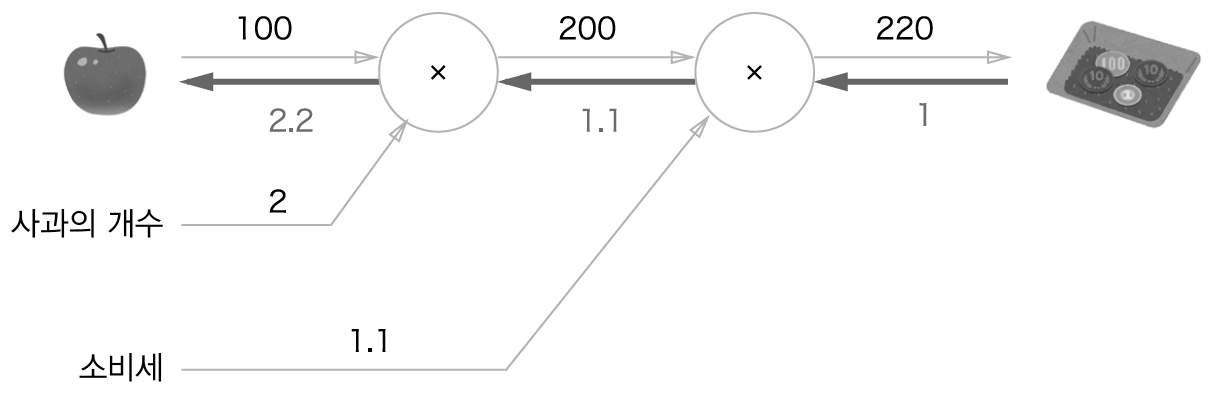

In [4]:
Image("2.png")

### 역전파는 국소적 미분을 전달한다

사과 가격이 오를 때 최종 지불 금액이 얼마나 오를까? >>> 사과 가격에 대한 지불 금액의 미분

### 국소적 미분을 전달하는 원리 : 연쇄법칙

### 연쇄법칙 : 합성함수의 미분은 합성함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다

In [ ]:
z = t**2 = (x + y)**2    
t = x + y   
z(t(x))

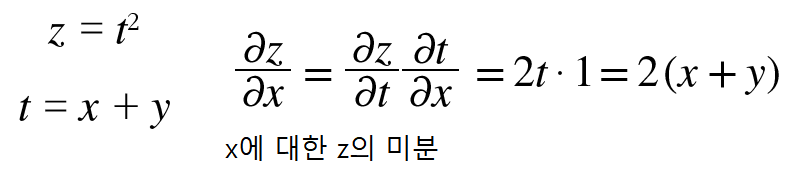

In [6]:
Image("4.png")

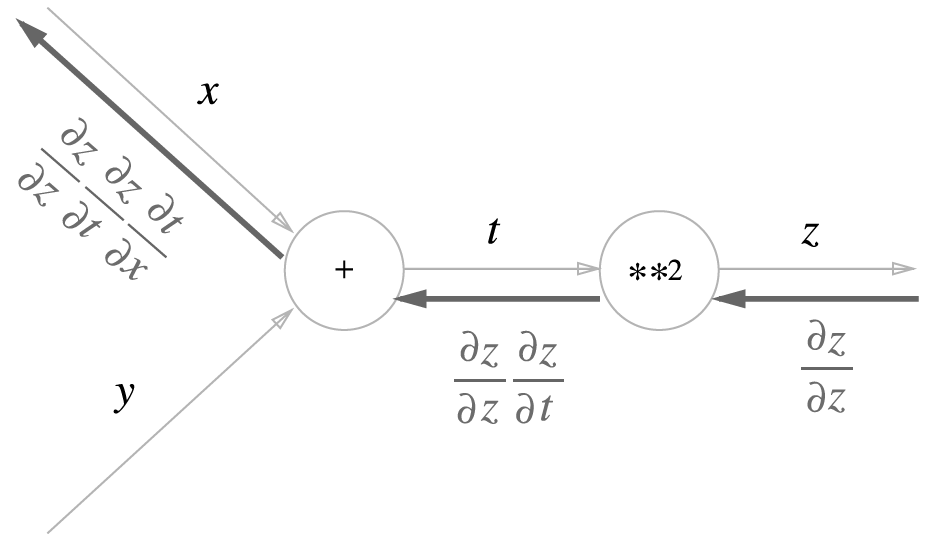

In [5]:
Image("3.png")

역전파의 계산 절차는 노드로 들어온 입력 신호(upstream gradient)에    
그 노드의 국소적 미분(local gradient, 편미분)을 곱한 후 다음 노드로 전달한다.

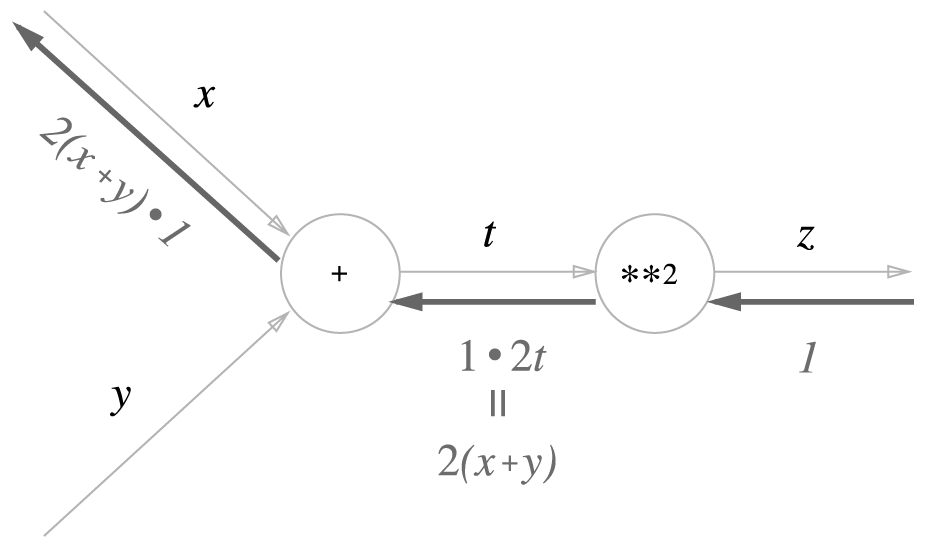

In [8]:
Image("5.png")

노드 연산이 더하기일 경우   
(덧셈 연산을 수행하는 함수를 미분할 경우)   
미분 값(local gradient)은 1이 된다   
   
### 따라서 downstrem gradient는   
### upstream gradient와 같다. 


곱하기 노드의 경우,   
### downstream gradient는       
### upstream gradient 에 input값을 서로 바꾸어 곱한 값과 같다.

덧셈의 역전파에서는 상류의 값을 그대로 흘려 보내서 순방향 입력 신호의 값이 필요 없지만   
곱셈의 역전파는 순방향 입력 신호 값이 필요하다   
### 그러므로 곱셈 노드를 구현할 때는 순전파의 입력 신호를 변수에 저장해둔다

# 1. 단순한 계층 구현하기
## 1.1 곱셈 계층

In [10]:
# coding: utf-8


class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):  #  dout : upstream gradient
        dx = dout * self.y     # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy

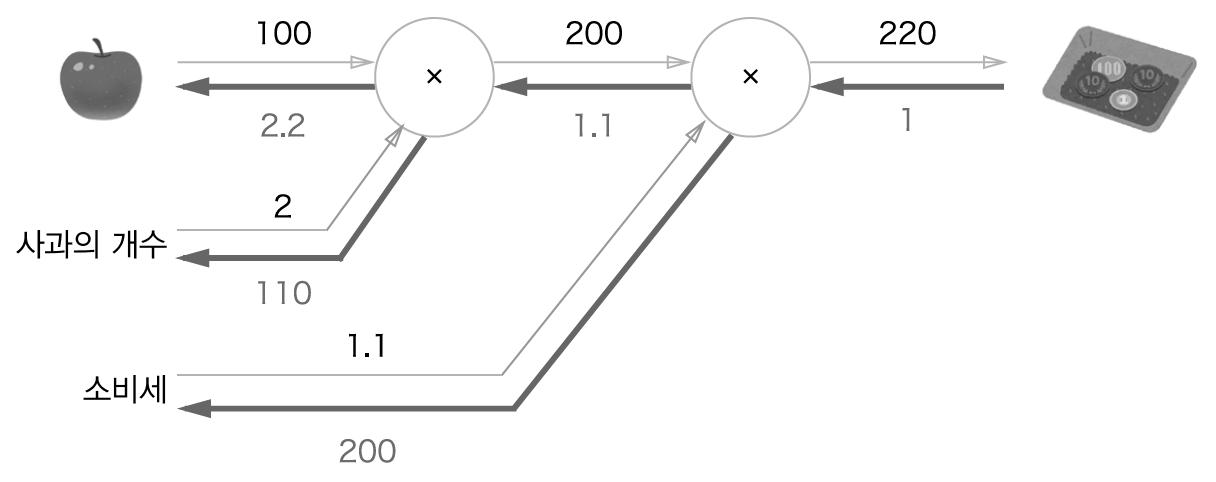

In [11]:
Image("6.png")

사과 가격에 대한 최종 지불 금액의 미분값 2.2 가 의미하는 것은   
사과 값이 100원에서 아주 조금 오르면(h), 최종 금액은 2.2h 만큼 오른다는 의미   
   
사과 개수에 대한 최종 지불금액의 미분값 110이 의미하는 것은   
사과 개수가 2개에서 아주 조금 늘어나면(h), 최종금액은 110h만큼 오른다는 의미   
   
소비세에 대한 최종 지불금액의 미분값 200이 의미하는 것은   
소비세가 1.1% 아주 조금 늘어나면(h), 최종금액은 200h만큼 오른다는 의미

### 위 역전파 구현 코드

In [13]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1  # 최상류의 미분값은 자기 자신에 대한 미분이므로 1

# 역전파 호출 순서는 순전파와 반대다
dapple_price, dtax = mul_tax_layer.backward(dprice)          # 역전파 메서드의 인수는 upstream gradient 
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


## 1.2 덧셈 계층

In [4]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

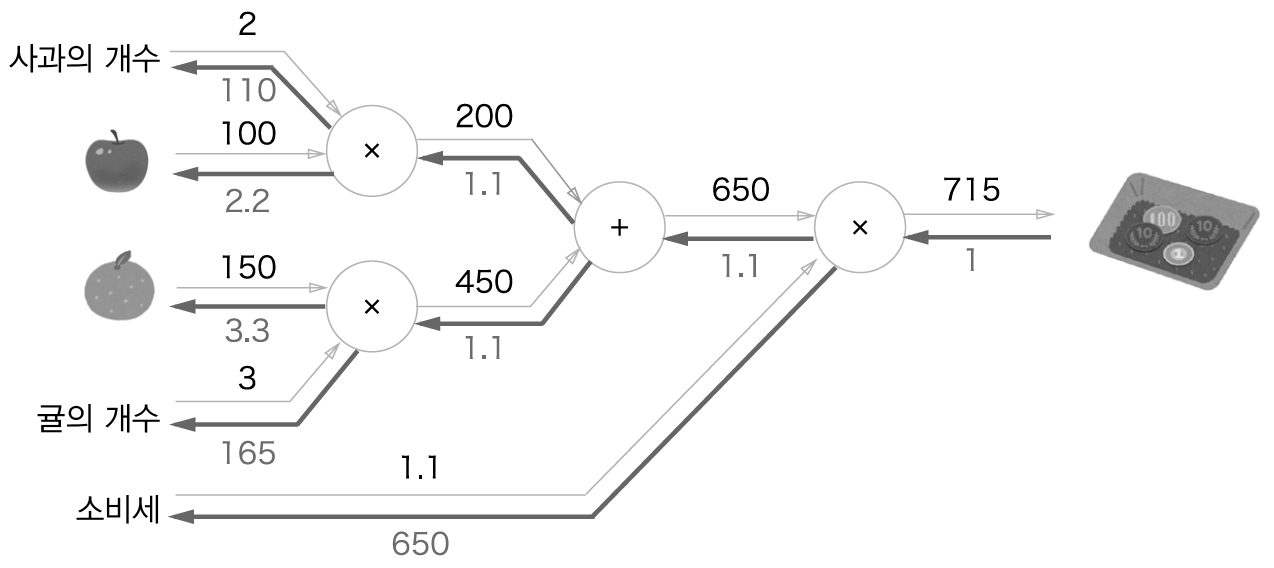

In [14]:
Image("7.png")

위 역전파 코드 구현

In [5]:
# coding: utf-8

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


# 2. 활성화 함수 계층 구현하기
## 2.1 ReLU 계층

# Relu 수식과 x에 대한 y의 미분

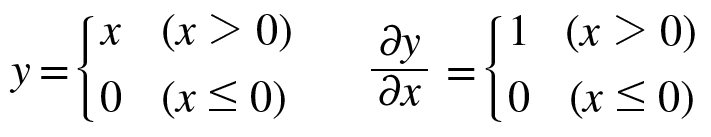

In [15]:
Image("8.png")

순전파시 입력값이 0보다 크면 역전파시 downstream gradient는 upstream gradient와 같고   
순전파시 입력값이 0보다 작으면 downstream gradient는 0이 된다

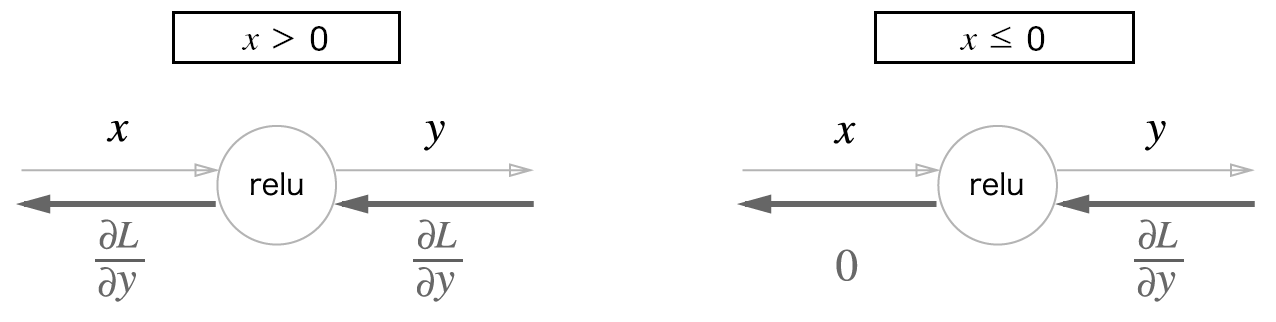

In [18]:
Image("9.png")

In [53]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):     # 넘파이 배열을 인수로 받는다
        
        self.mask = (x <= 0)   # 0 또는 0보다 작은 값들은 True로, 0보다 큰 값은 False로 하는
                               #  x와 같은 shape의 마스크 인덱스 배열을 만든다
            
        out = x.copy()         # 입력값의 사본을 만든 뒤
        
        out[self.mask] = 0     # 마스크 인덱스 배열로 사본에 인덱싱을 해서 
                               # 0 또는 0보다 작은 입력값들은 0으로 만든다
        
        return out
    
    def backward(self, dout):  # 마스크를 만드는 이유는 순전파 때 입력값이 0 이하면 역전파 시 값은 0이 돼야 하므로
        dout[self.mask] = 0    # 역전파시 순전파 때 만들어 둔 마스크 인덱스 배열을 써서
        dx = dout              # 마스크의 원소가 True인 곳에는 upstream gradient를 0으로 설정한다.
        
        return dx

In [52]:
import numpy as np
x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [43]:
mask = x <= 0  
print(mask)      
                 

[[False  True]
 [ True False]]


In [49]:
out = x.copy()
print(out)

[[ 1.  -0.5]
 [-2.   3. ]]


In [50]:
out[mask]        # 마스크 인덱스 배열은 True값을 가지는 요소와 같은 위치를 가지는 out 배열의 요소들을 반환하다

                 # 마스크 인덱스 배열을 사용해 인덱싱하면 1차원 배열을 반환한다.

array([-0.5, -2. ])

In [46]:
out[mask] = 0    # mask 배열의 True값에 해당하는 위치의 out배열의 원소들을 모두 0으로 만들어준다.
print(out)

[[1. 0.]
 [0. 3.]]


In [24]:
dout = out
dout[mask] = 0
dx = dout
print(dx)

[[1. 0.]
 [0. 3.]]


## 2.2 Sigmoid 계층

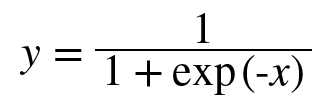

In [54]:
Image("10.png")

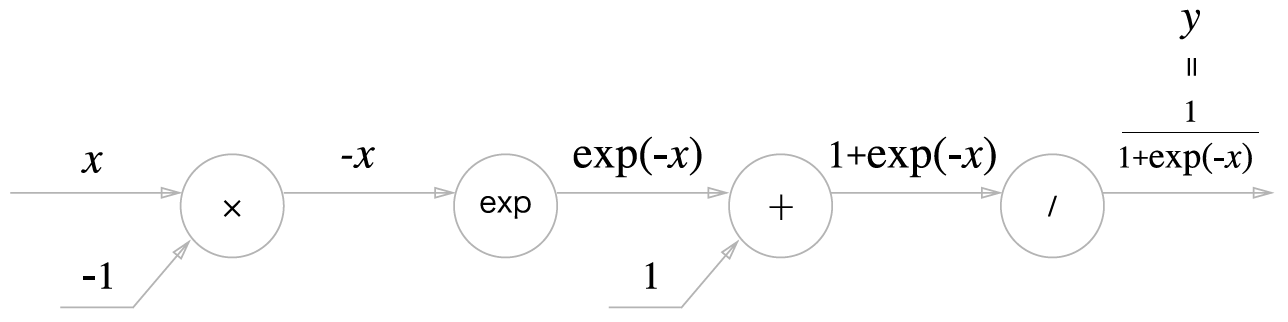

In [55]:
Image("11.png")   

/ 노드 :  ( 1/입력값 ) 연산을 하는 노드,  즉 입력값의 역수를 반환하는 노드    
       
exp 노드 : 입력값을 e의 지수에 넣어 거듭제곱을 연산하는 노드    

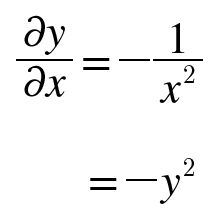

In [57]:
Image("12.png")

/ 노드의 국소적 미분값은   
y = 1 / x 함수에서 x에 대해 y를 미분한 값과 같다.   
x의 -1제곱을 미분하면 -(x의 -2제곱)과 같다   
   
다시 말해 / 노드의 local gradient는 순전파의 출력을 제곱하고 마이너스를 붙인 값   
따라서 / 노드의 downstream gradient는 upstream gradient 곱하기 마이너스 y제곱  
   
   
(몫의 미분 공식을 사용해 음수 지수를 가진 거듭제곱을 미분하는 공식 유도) : 다시 미분 적분 111쪽 참고   

### 나머지 과정은 https://questionet.tistory.com/23?category=961868 참고

e의 x제곱을 미분하면 자기자신이 된다   
따라서 exp노드의 local gradient는 e의 -x제곱

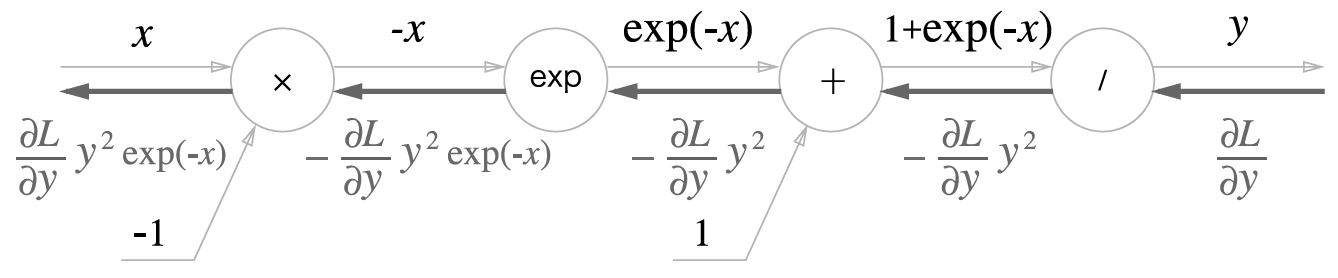

In [60]:
Image("13.png")   (local gradient X upstream gradient = downstream gradient) : chain rule >>>  BP by computational graph

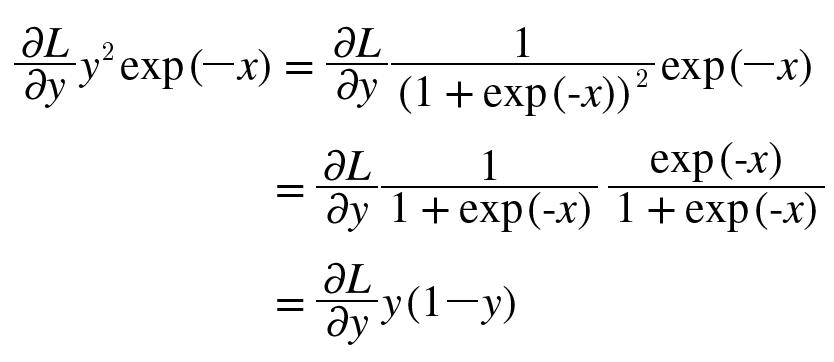

In [62]:
Image("14.png")

### 최종적으로 시그모이드 계층의 역전파는 순전파의 출력 y만으로 계산할 수 있다는 점이 핵심

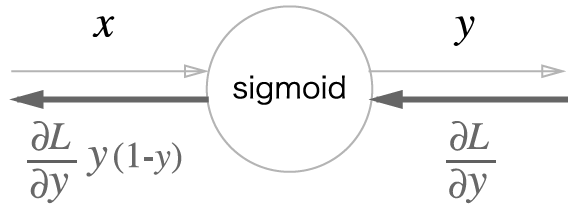

In [63]:
Image("15.png")

따라서 시그모이드 계층의 미분을 구하기 위해선 출력값 y만 저장해 두면 된다는 거겠지

In [8]:
class Sigmoid:
    def __init__(self):
        self.out = None      # 시그모이드 계층의 역전파때 쓸 출력값을 저장하는 인스턴스 변수 out
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

# 3. Affine/Softmax 계층 구현하기
## 3.1 Affine 계층

### 순전파 때 수행하는 행렬곱 연산 WX + b 를 기하학에서는 아핀변환이라고 한다

아핀공간은 원점이 존재하지 않는 벡터공간으로 이해하면 된다.   
아핀변환은 선형변환을 한 후 시프팅(Translation)한 것이다.   
   
   
Y = WX + b   
   
   
이처럼 아핀변환은 b (Translation term) 이 있기때문에 기본적으로 비선형(non-linear)변환이다.   
하지만 아핀변환이 비선형변환이라 하더라도 우리가 원하는 정도의 비선형성을 가지진 못한다.   
   
   
아핀변환은 그래봐야 공간의 원점을 시프팅하는 정도의 변환이며   
기저가 이루는 평행사변형의 격자 구조는 모든 영역에서 동일하게 유지되기 때문이다.   
   
   
이에 sigmoid, arctan나 ReLU같은 일반적으로 쓰이는 비선형함수를 활성화함수로 사용하여    
더 강한 비선형성을 가지도록 해야 한다.   
   
   

참고 https://hooni-playground.com/1271/



### 어파인 계층은 완전연결계층이다.   
### 1차원 배열로 평탄화한 후 dense layer에 통과시킨 (마지막에 활성화 함수를 씌워줌) 계층을
### 완전연결계층이라고도 한다.
### affine layer, fully connected layer의 문제점은 데이터의 형상이 무시된다는 점이다  

In [73]:
X = np.arange(2).reshape(2,)   # 입력
W = np.arange(6).reshape(2,3) # 가중치
B = np.arange(3).reshape(3,)   # 편향

In [85]:
print(X)
print(W)
print(B)

[0 1]
[[0 1 2]
 [3 4 5]]
[0 1 2]


In [86]:
Y = np.dot(X, W) + B    # (1 x 2) X (2 x 3) = (1 x 3) 행렬곱 연산 수행.
Y

array([3, 5, 7])

### 어파인 계층의 계산그래프

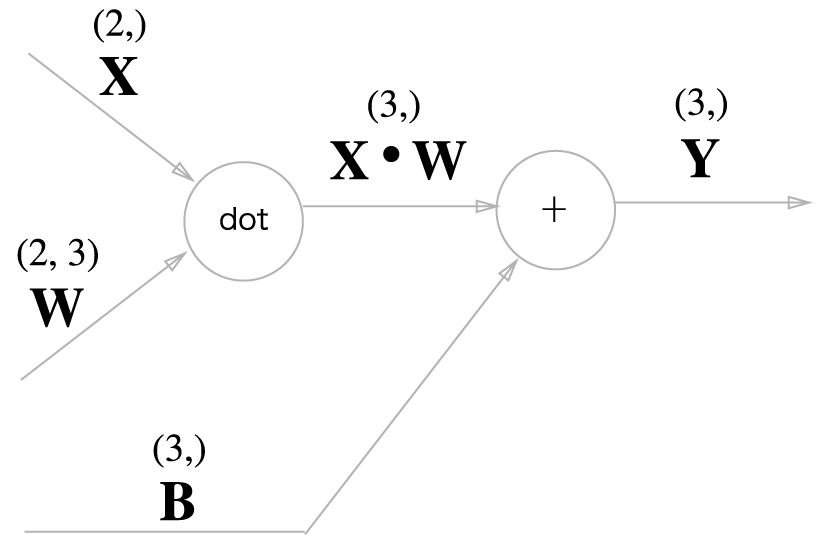

In [88]:
Image("16.png")

에지에 스칼라가 아닌 다차원 배열(행렬)이 흐른다   
   
어파인 계층에서 dot노드의 downstream gradient는 다음과 같다

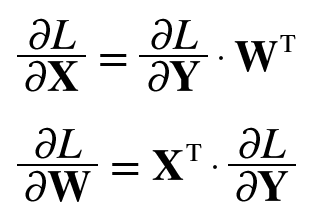

In [89]:
Image("17.png")

dot 노드의 local gradient는 X에 대한 WX의 미분값과 W에 대한 WX의 미분값이다.   
그런데 X에 대한 WX의 미분값은 W가 아니라 W의 전치행렬이 되고   
W에 대한 WX의 미분값은 X가 아니라 X의 전치행렬이 된다   

왜 전치행렬로 바뀔까?  # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 미시건 lec 06 참고

전치행렬이란 행렬 (i, j) 위치의 원소를 (j, i) 위치로 바꾼 행렬이다

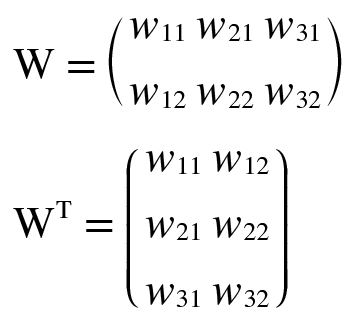

In [90]:
Image("18.png")

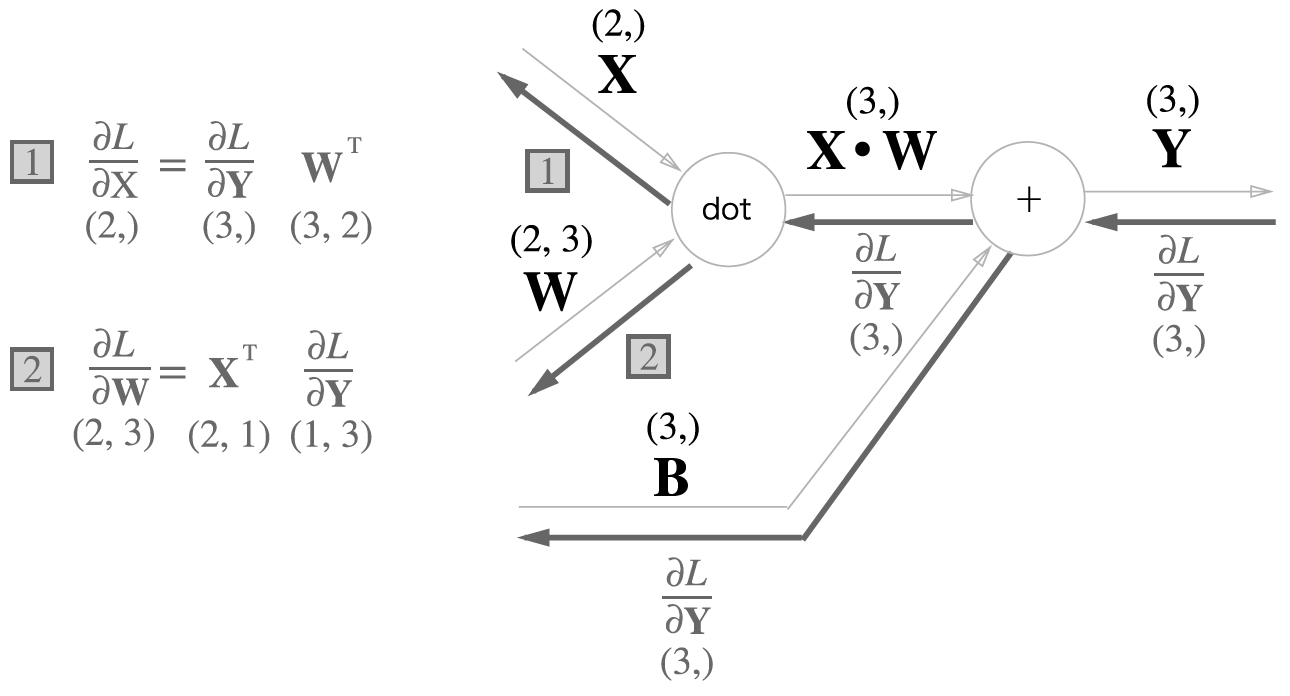

In [92]:
Image("19.png")

전치행렬로 바뀐 까닭은 형상이 맞아야 하기 때문.   
역전파시 dot노드에서 upstream gradient인 dL/dY 는 shape가 (3,)이다.   
여기에 W를 그대로 행렬곱할 수 없다. (3,) X (2, 3) = 연산불가   
따라서 (3,) X (3, 2) 로 맞춰주기 위해   
W와 X를 전치시킨 것!!!

## 3.2 배치용 Affine 계층

위의 어파인 계층 역전파는 입력 데이터 하나만 고려한 것이다.   
데이터 N개를 묶어서 순전파하는 경우의 역전파의 계산그래프는 다음과 같다

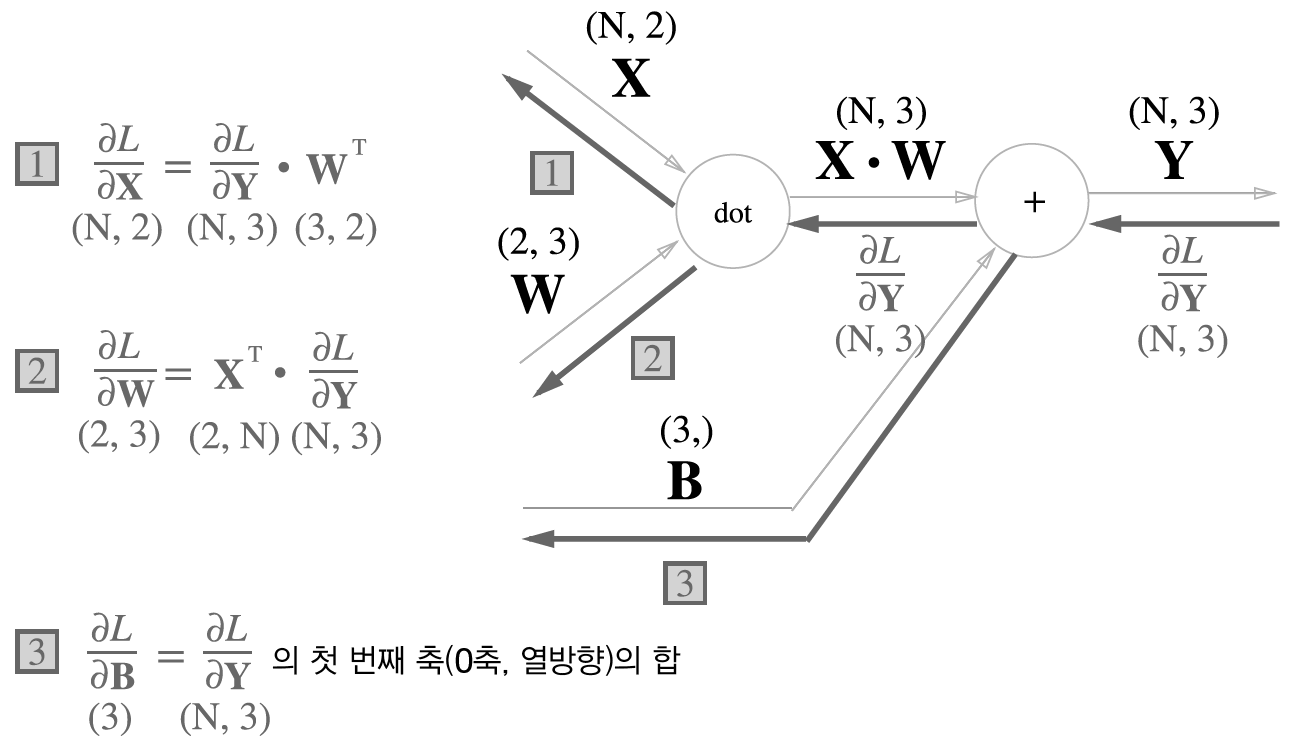

In [94]:
Image("20.png")

차이는 X의 형상이 (2,)에서 (N,2)가 되고   
dot 노드의 local gradient, W에 대한 WX의 미분 값의 형상이 (2,1) 에서 (2, N)으로 바꼈다는 것   
그리고 편향의 미분값의 형상도 (3)에서 (N, 3)으로 바꼈다는 것 뿐이다

순전파 때 편향의 덧셈은 각각의 데이터에 더해진다 : 브로드캐스팅   
그래서 편향의 역전파때는 각 데이터의 역전파 값을 차원 수를 축으로 하여 각 축방향으로 더해 다시 원래 shape대로 모아준다


In [15]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

In [16]:
X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [17]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [18]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
dB = np.sum(dY, axis=0)   # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향
dB

array([5, 7, 9])

# 어파인 계층 구현

In [96]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)    # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향
        
        return dx

# 아래 구현은 입력 데이터가 텐서(4차원 데이터)인 경우도 고려한 구현
# class Affine:
#     def __init__(self, W, b):
#         self.W = W
#         self.b = b
        
#         self.x = None
#         self.original_x_shape = None
#         # 가중치와 편향 매개변수의 미분
#         self.dW = None
#         self.db = None

#     def forward(self, x):
#         # 텐서 대응
#         self.original_x_shape = x.shape 
#         x = x.reshape(x.shape[0], -1)   4차원을 2차원으로 만든 것 ex) 1 x 28 x 28 x 3 이면   1 x 784 
#         self.x = x

#         out = np.dot(self.x, self.W) + self.b

#         return out

#     def backward(self, dout):
#         dx = np.dot(dout, self.W.T)
#         self.dW = np.dot(self.x.T, dout)
#         self.db = np.sum(dout, axis=0)
        
#         dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응) ???
#         return dx

## 3.3 Softmax-with-Loss 계층

softmax 계층은 입력값을 정규화(출력의 합이 1이 되도록)하여 출력한다.

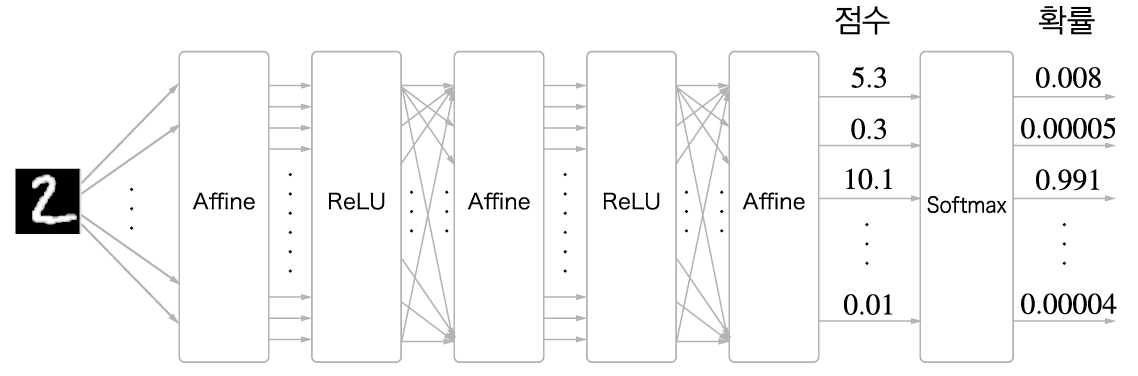

In [97]:
Image("21.png")

# trainning 단계에서는 softmax 층을 쓴다.   
   
   
# 그러나 inference 단계에서는 일반적으로 softmax 층을 쓰지 않는다   
# inference시 답을 하나만 내는 경우에는 가장 높은 score만 알면 되기 때문이다

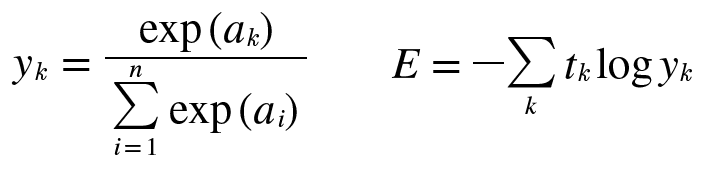

In [99]:
Image("22.png")

## 크로스 엔트로피 오차 계층의 역전파에서 중요한 건  
   
   
# y = log x 함수에서 ( x에 대한 y의 미분 ) dy / dx = 1 / x 라는 것

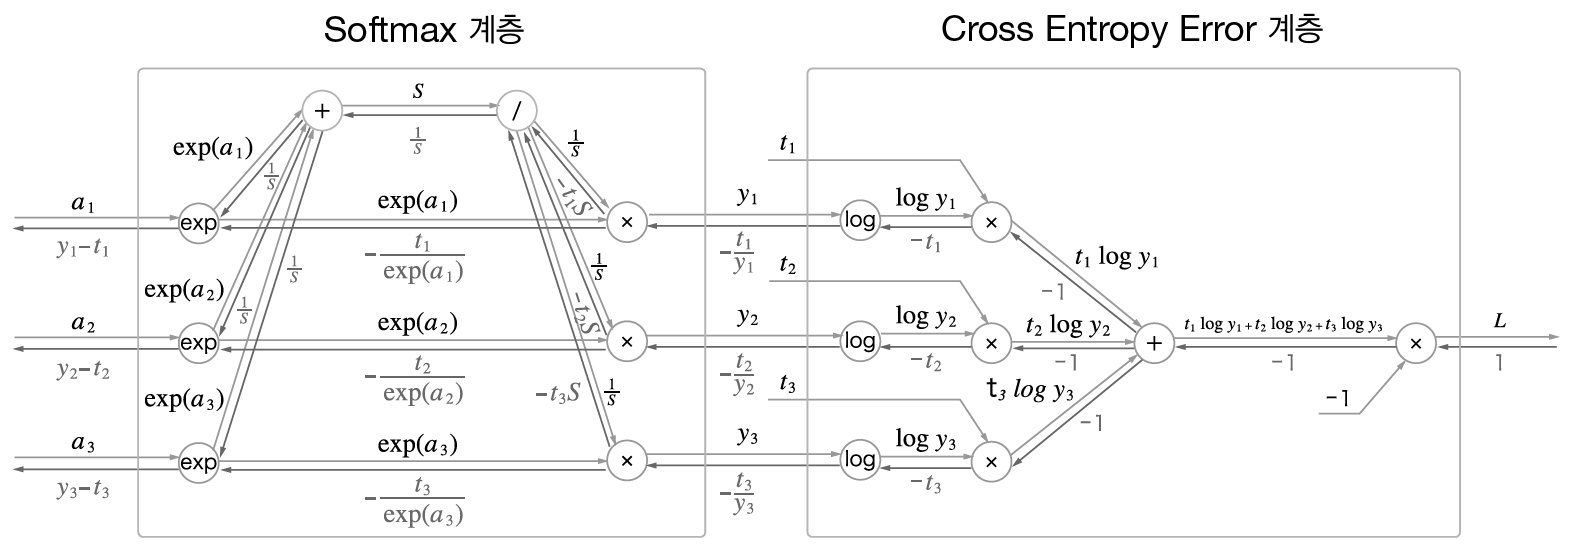

In [100]:
Image("23.png")



   
   

    
### 소프트맥스 층의 역전파에서   
   
/ 노드의 국소적 미분값은   
y = 1 / x 함수에서 x에 대해 y를 미분한 값과 같다.   
x의 -1제곱을 미분하면 -(x의 -2제곱)과 같다   
(몫의 미분 공식을 사용해 음수 지수를 가진 거듭제곱을 미분하는 공식 유도) : 다시 미분 적분 111쪽 참고   
   
다시 말해 
   
/ 노드의 upstream gradient는 (-t1S) + (-t2S) + (-t3) = -S(t1+t2+t3)   
   
/ 노드의 local gradient는 순전파의 출력을 제곱하고 마이너스를 붙인 값, 따라서 -((1/S)**2)   
   
   
따라서 / 노드의 downstream gradient는 -S(t1+t2+t3) X -((1/S)**2) = (t1 + t2 + t3) / S  
   
copy gate : gradient adder   
  input이 하나고 output은 두 개를 갖는 노드인 경우   
  
  각각의 upstream gradient 단순히 더해주면 된다   (참고 : https://questionet.tistory.com/18?category=961868 )

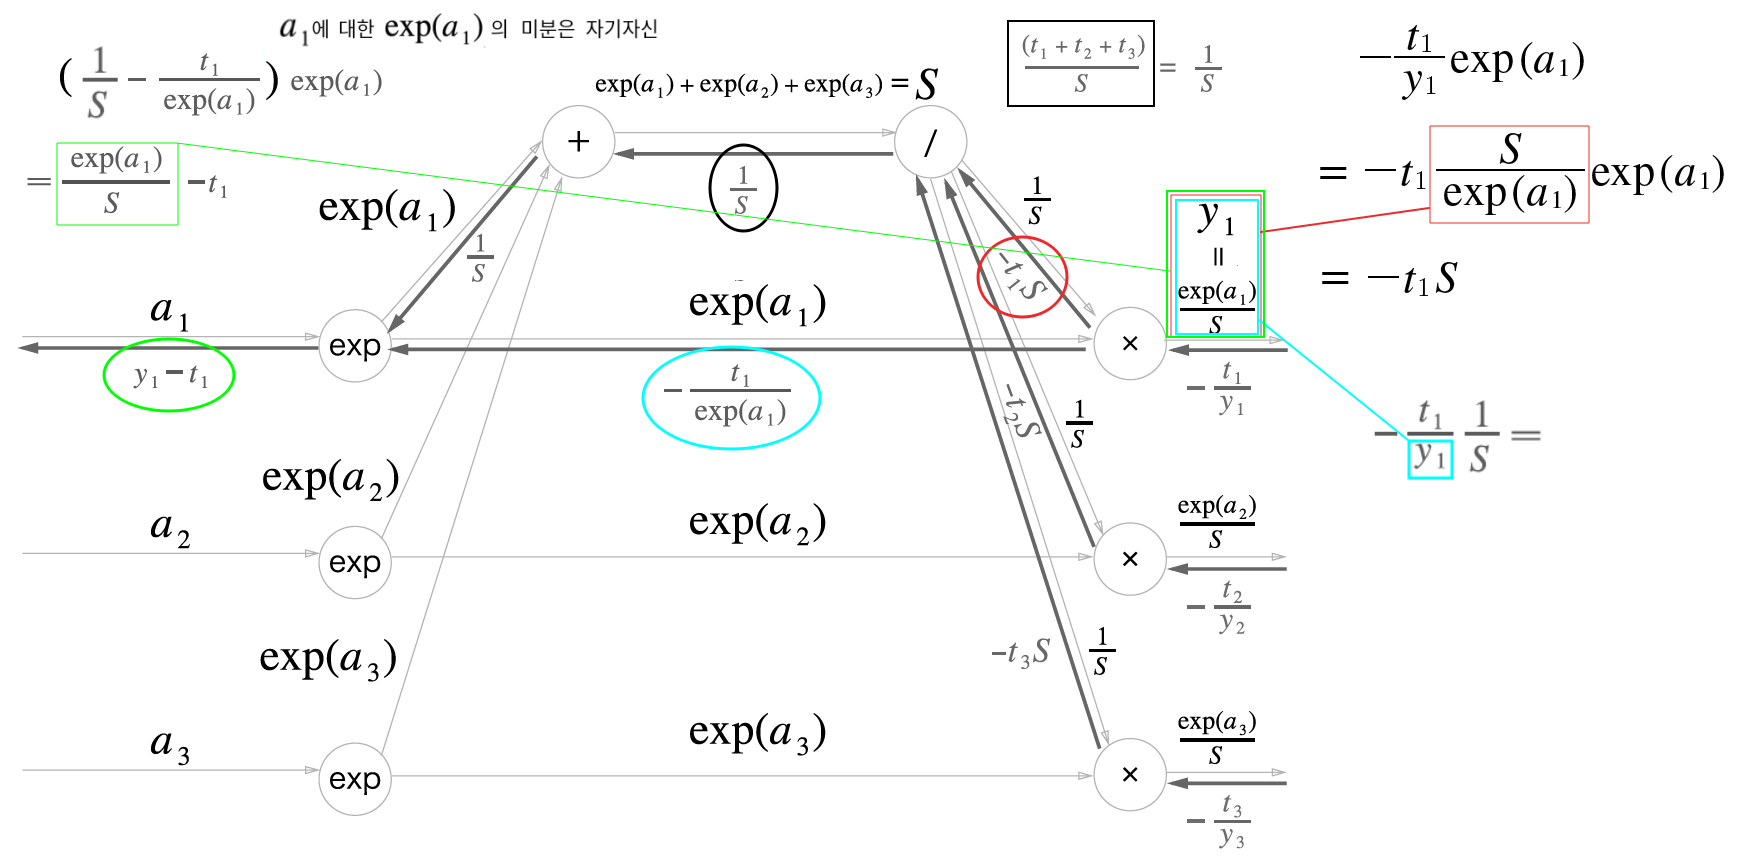

In [103]:
Image("24.png")

간단히 하면

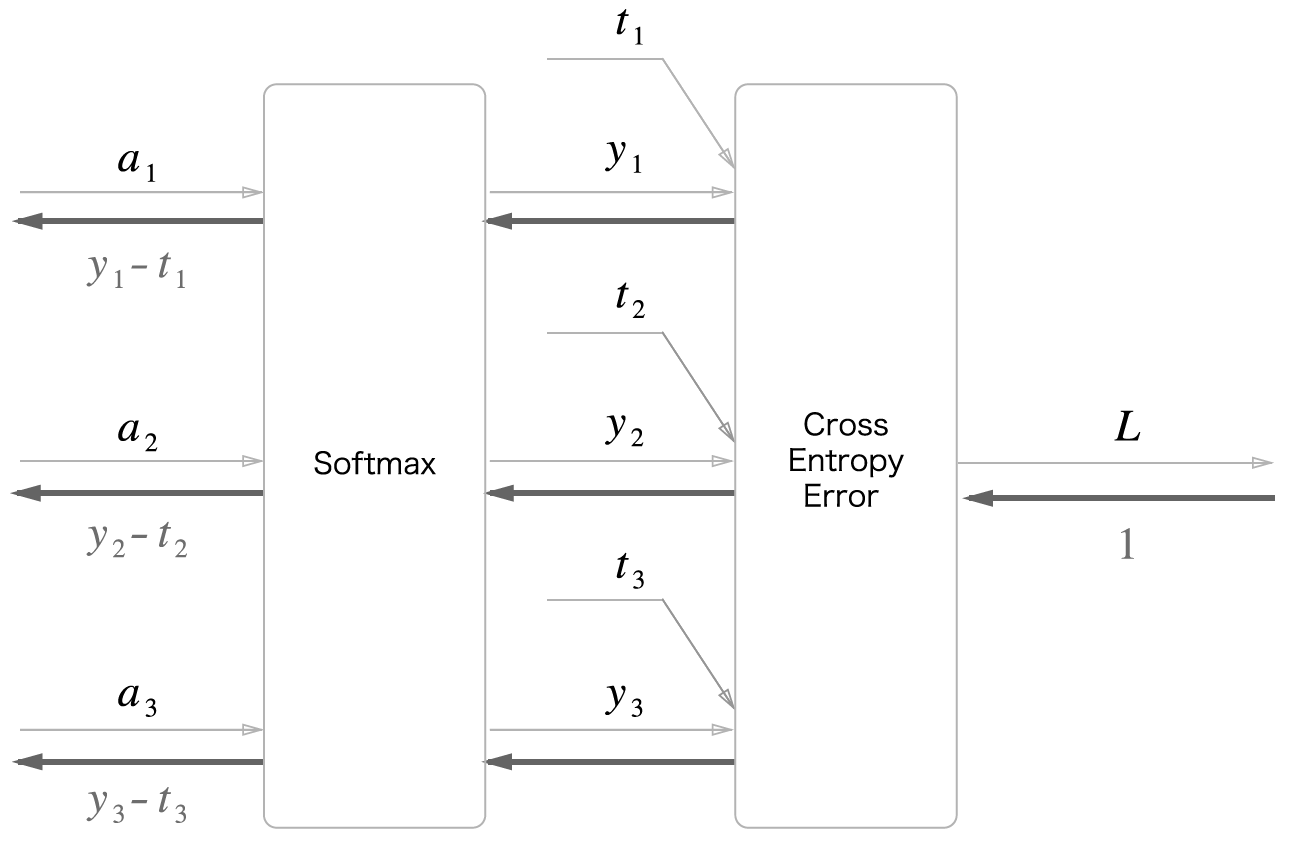

In [101]:
Image("25.png")

softmax 계층의 역전파는    
   
   (softmax 계층의 출력 - 정답 레이블) 로 말끔하게 떨어진다.   
     
      그런데 신경망 학습의 목적은 softmax 계층의 출력이 정답레이블과 가까워지도록 가중치 매개변수의 값을 조정하는 것이다.    
      softmax 계층의 역전파 결과가 바로 softmax 계층과 출력이 정답레이블의 차이 값이므로   
      정답 클래스의 softmax 계층의 출력이 낮은 경우, 이에 해당하는 역전파는 커다란 오차를 앞으로 전달하게 된다!!!    
      
가령 정답 레이블이 (0, 1, 0) 일 때 softmax 출력이 (0.3, 0.2, 0.5) 라면, 역전파는 (0.3, -0.8, 0.5) 가 되어    
softmax계층의 앞 레이어들은 이 큰 오차로부터 큰 깨달음을 얻게 된다.

이렇게 softmax 계층의 역전파 결과가 말끔하게 떨어지는 이유는 크로스 엔트로피 오차 함수가 그렇게 설계되었기 때문이다   
회귀의 출력층에서 사용하는 항등함수의 오차제곱합을 사용해도 역전파의 결과는   
(모델의 예측값 - 정답 레이블) 로 말끔하게 떨어진다 

# softmax with loss 역전파 구현

In [22]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None   # 손실
        self.y = None      # softmax의 출력
        self.t = None      # 정답 레이블(원-핫 벡터)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size   # 역전파시 전파하는 값을 배치의 수로 나눠서 
                                              # 데이터 1개당 오차를 앞계층으로 전파한다. 배치로 나누는 이유는
                                              # 입력값이 배치단위로 들어가서 모델의 예측값도 그 배치단위 데이터가 다 합쳐진것이니까.
        
        return dx

# 4. 오차역전파법 구현하기
## 4.1 오차역전파법을 적용한 신경망 구현하기

In [104]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 입력층의 뉴련수, 은닉층의 뉴런수, 출력층의 뉴런수, 가중치 초기화시 정규분포의 스케일
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()             # layers : 신경망의 계층을 보관

        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values(): # OrderedDict layers 에 추가한 순서대로 각 계층의 forward()를 호출하면
            x = layer.forward(x)           # 순전파가 된다.
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)# coding: utf-8         # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향
        if t.ndim != 1 : t = np.argmax(t, axis=1)       # # np.argmax()  배열의 원소 중 최대값의 인덱스를 반환한다. 
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):                           # 수치미분은 디버깅 툴로 쓰자
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}                                                
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()                         # 역전파시엔 반대로 호출하기만 하면 된다.
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}                        # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<???????????????????????????????             
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

## 4.2 오차역전파법으로 구한 기울기 검증하기

오차역전파법은 구현이 복잡해서 실수가 생길 수 있다.   
그래서 수치 미분 결과와 비교하여 제대로 구현했는지 검증한다.   
두 방식으로 구한 기울기가 거의 같은지 확인하는 작업을   
**gradient check** 라고 한다   
   
   gradient_check.py 확인

### gradient_check 구현

In [105]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print("\n" + key + ":" + str(diff))


W1:3.305191297589073e-10

b1:1.963482125319927e-09

W2:3.8282087861867356e-09

b2:1.4021334255459594e-07


## 4.3 오차역전파법으로 사용한 학습 구현하기

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
#     grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("\n iter_per_epoch:", i, "\t train_acc: ", train_acc, "\t test_acc:", test_acc)


 iter_per_epoch: 0 	 train_acc:  0.09908333333333333 	 test_acc: 0.0974
